![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/dodkins/PythonProjects/stocks/options_testing/options_testing')

import os
from datetime import datetime 
import pandas as pd
import opstrat as op

/Users/dodkins/.conda/envs/stocks/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from qc_simulator import QuantBook, Resolution, OptionRight

In [3]:
import quantconnect
# from strategies import measure_period_profit
# from strategies import add_expirations

In [4]:
qbw = quantconnect.QuantBookWrapper({'qb':QuantBook(),'Resolution':Resolution,'OptionRight':OptionRight})

In [5]:
from strategies import IronCondors, measure_period_profit
import plots

In [6]:
tsla = qbw.get_tsla()

In [7]:
class LegMeta():
    def __init__(self, trans='sell', contract='call', strike_offset=0, exp_offset=0, name=None):
        self.trans=trans
        self.contract=contract
        self.strike_offset=strike_offset
        self.exp_offset=exp_offset
        if name:
            self.name = name
        else:
            self.name =  f'{trans}_{contract}_{strike_offset}_{exp_offset}'
    def __repr__(self):
        return self.name

In [8]:
l = LegMeta()

In [9]:
from strategies import StrategyBase

In [10]:
strat = StrategyBase(qbw=qbw)

In [11]:
tsla

,open,high,low,close,volume
time,,,,,
2022-08-03 13:00:00,304.746636,309.109969,303.333303,307.993303,10662028.0
2022-08-03 14:00:00,307.943303,308.416636,306.036636,307.446636,6186187.0
2022-08-03 15:00:00,307.473303,309.466636,306.823303,307.983303,7723828.0
2022-08-03 16:00:00,307.993303,308.756636,307.296636,307.396636,10598359.0
2022-08-04 10:00:00,311.236636,313.626635,308.866636,311.539969,14604838.0
...,...,...,...,...,...
2022-09-13 12:00:00,293.680000,293.990000,290.400000,291.000000,7883773.0
2022-09-13 13:00:00,291.000000,293.280000,290.670000,292.300000,5298142.0
2022-09-13 14:00:00,292.270000,295.500000,291.780000,294.830000,9703434.0


In [44]:
legs = [LegMeta(), LegMeta(trans='buy', contract='put', strike_offset=0, exp_offset=1)]
strat = StrategyBase(qbw=qbw, legs=legs)

In [37]:
strat.legs, strat.legs[0].__dict__

([sell_call_0_0, buy_put_0_1],
 {'trans': 'sell',
  'contract': 'call',
  'strike_offset': 0,
  'exp_offset': 0,
  'name': 'sell_call_0_0'})

In [47]:
ic = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once')
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])

In [66]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= -10, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= -10, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 0, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 0, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 10, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 10, exp_offset= 1),
]  
strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=5, stop_gain=10)
ic = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once')
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])

0 2022-08-03 13:00:00 stop_gain
1 2022-08-03 14:00:00 stop_gain
2 2022-08-03 15:00:00 stop_gain
3 2022-08-03 16:00:00 stop_gain
4 2022-08-04 10:00:00 stop_gain
5 2022-08-04 11:00:00 stop_gain
6 2022-08-04 12:00:00 stop_gain
7 2022-08-04 13:00:00 stop_gain
8 2022-08-04 14:00:00 stop_gain
9 2022-08-04 15:00:00 stop_gain
10 2022-08-04 16:00:00 stop_gain
11 2022-08-05 10:00:00 stop_gain
12 2022-08-05 11:00:00 stop_gain
13 2022-08-05 12:00:00 stop_gain
14 2022-08-05 13:00:00 stop_gain
15 2022-08-05 14:00:00 stop_gain
16 2022-08-05 15:00:00 stop_gain
17 2022-08-05 16:00:00 stop_gain
18 2022-08-08 10:00:00 stop_gain
19 2022-08-08 11:00:00 stop_gain
20 2022-08-08 12:00:00 stop_gain
21 2022-08-08 13:00:00 stop_gain
22 2022-08-08 14:00:00 stop_gain
23 2022-08-08 15:00:00 stop_gain
24 2022-08-08 16:00:00 stop_gain
25 2022-08-09 10:00:00 stop_gain
26 2022-08-09 11:00:00 stop_gain
27 2022-08-09 12:00:00 stop_gain
28 2022-08-09 13:00:00 stop_gain
29 2022-08-09 14:00:00 stop_gain
30 2022-08-09 15:00:

In [67]:
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs], metric='strategy_close')

In [69]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
    LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
]  
strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=None, stop_gain=None)
ic = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once')
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])

In [70]:
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs], metric='strategy_close')

In [73]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
    LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
]  
strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=50, stop_gain=None)
ic = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once')
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs], metric='strategy_close')

0 2022-08-03 13:00:00 stop_loss_met
1 2022-08-03 14:00:00 stop_loss_met
2 2022-08-03 15:00:00 stop_loss_met
3 2022-08-03 16:00:00 stop_loss_met
4 2022-08-04 10:00:00 stop_loss_met
5 2022-08-04 11:00:00 stop_loss_met
6 2022-08-04 12:00:00 stop_loss_met
7 2022-08-04 13:00:00 stop_loss_met
8 2022-08-04 14:00:00 stop_loss_met
9 2022-08-04 15:00:00 stop_loss_met
10 2022-08-04 16:00:00 stop_loss_met
11 2022-08-05 10:00:00 stop_loss_met
12 2022-08-05 11:00:00 stop_loss_met
13 2022-08-05 12:00:00 stop_loss_met
14 2022-08-05 13:00:00 stop_loss_met
15 2022-08-05 14:00:00 stop_loss_met
16 2022-08-05 15:00:00 stop_loss_met
17 2022-08-05 16:00:00 stop_loss_met
18 2022-08-08 10:00:00 stop_loss_met
19 2022-08-08 11:00:00 stop_loss_met
20 2022-08-08 12:00:00 stop_loss_met
21 2022-08-08 13:00:00 stop_loss_met
22 2022-08-08 14:00:00 stop_loss_met
23 2022-08-08 15:00:00 stop_loss_met
24 2022-08-08 16:00:00 stop_loss_met
25 2022-08-09 10:00:00 stop_loss_met
26 2022-08-09 11:00:00 stop_loss_met
27 2022-08-

In [71]:
ic

,underlying_open,underlying_high,underlying_low,underlying_close,volume,strategy_open,strategy_close,hourly_profit,date,week,...,buy_put_-16_0_exp,sell_call_15_0_open,sell_call_15_0_close,buy_call_16_0_open,buy_call_16_0_close,sell_put_-15_0_open,sell_put_-15_0_close,buy_put_-16_0_open,buy_put_-16_0_close,running_profit
0,304.746636,309.109969,303.333303,307.993303,10662028.0,4.928035e-04,1.825469e-04,-0.000310,2022-08-03 13:00:00,31,...,2022-08-05 00:00:00,0.002235,0.005456,-0.002235,-0.005456,5.476585e-04,2.003592e-04,-5.485496e-05,-1.781226e-05,-0.000310
1,307.943303,308.416636,306.036636,307.446636,6186187.0,1.605319e-04,1.878619e-04,-0.000005,2022-08-03 14:00:00,31,...,2022-08-05 16:00:00,0.004870,0.004257,-0.004870,-0.004257,1.755880e-04,2.058429e-04,-1.505614e-05,-1.798100e-05,-0.000316
2,307.473303,309.466636,306.823303,307.983303,7723828.0,1.608954e-04,1.365365e-04,0.000051,2022-08-03 15:00:00,31,...,2022-08-05 16:00:00,0.003859,0.004440,-0.003859,-0.004440,1.756369e-04,1.487841e-04,-1.474151e-05,-1.224767e-05,-0.000264
3,307.993303,308.756636,307.296636,307.396636,10598359.0,1.166312e-04,1.417696e-04,-0.000005,2022-08-03 16:00:00,31,...,2022-08-05 16:00:00,0.004002,0.003387,-0.004002,-0.003387,1.266361e-04,1.542405e-04,-1.000481e-05,-1.247093e-05,-0.000269
4,311.236636,313.626635,308.866636,311.539969,14604838.0,4.047187e-07,3.482258e-07,0.000141,2022-08-04 10:00:00,31,...,2022-08-05 16:00:00,0.000853,0.000952,-0.000853,-0.000952,4.137666e-07,3.558719e-07,-9.047890e-09,-7.646148e-09,-0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,293.680000,293.990000,290.400000,291.000000,7883773.0,1.768604e-02,2.978035e-02,-0.011235,2022-09-13 12:00:00,37,...,2022-09-16 16:00:00,0.002967,0.001510,-0.002967,-0.001510,2.250231e-02,3.864908e-02,-4.816273e-03,-8.868738e-03,0.254239
196,291.000000,293.280000,290.670000,292.300000,5298142.0,2.847345e-02,2.211874e-02,0.007662,2022-09-13 13:00:00,37,...,2022-09-16 16:00:00,0.001387,0.001939,-0.001387,-0.001939,3.679018e-02,2.830140e-02,-8.316725e-03,-6.182659e-03,0.261901
197,292.270000,295.500000,291.780000,294.830000,9703434.0,2.119367e-02,1.261254e-02,0.009506,2022-09-13 14:00:00,37,...,2022-09-16 16:00:00,0.001770,0.003370,-0.001770,-0.003370,2.700553e-02,1.578539e-02,-5.811852e-03,-3.172854e-03,0.271407
198,294.830000,295.970000,293.000000,294.100000,7136008.0,1.193098e-02,1.388813e-02,-0.001276,2022-09-13 15:00:00,37,...,2022-09-16 16:00:00,0.003116,0.002597,-0.003116,-0.002597,1.486910e-02,1.739364e-02,-2.938121e-03,-3.505510e-03,0.270131


In [51]:
from utils import pretty_strat_df
pretty_strat_df(ic)

,underlying open,underlying close,strategy open,strategy close,hourly profit,date,dte,new option,sell call -10 0 strike,sell call -10 0 exp,...,buy call -10 1 close,sell call 0 0 open,sell call 0 0 close,buy call 0 1 open,buy call 0 1 close,sell call 10 0 open,sell call 10 0 close,buy call 10 1 open,buy call 10 1 close,running profit
0,304.75,307.99,-8.42,-8.52,0.11,2022-08-03 13:00:00,2.12,True,273.0,2022-08-05 00:00:00,...,-36.07,6.23,8.21,-11.36,-13.21,0.11,0.20,-2.14,-2.71,0.11
1,307.94,307.45,-8.53,-8.51,-0.01,2022-08-03 14:00:00,2.08,False,273.0,2022-08-05 16:00:00,...,-35.55,8.13,7.81,-13.16,-12.87,0.19,0.17,-2.69,-2.59,0.10
2,307.47,307.98,-8.52,-8.54,0.02,2022-08-03 15:00:00,2.04,False,273.0,2022-08-05 16:00:00,...,-36.04,7.78,8.11,-12.86,-13.16,0.17,0.18,-2.58,-2.68,0.12
3,307.99,307.40,-8.54,-8.53,-0.01,2022-08-03 16:00:00,2.00,False,273.0,2022-08-05 16:00:00,...,-35.49,8.08,7.69,-13.14,-12.79,0.18,0.16,-2.66,-2.55,0.11
4,311.24,311.54,-8.70,-8.70,0.17,2022-08-04 10:00:00,1.25,False,273.0,2022-08-05 16:00:00,...,-39.24,9.63,9.87,-14.74,-14.94,0.11,0.12,-3.02,-3.08,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,293.68,291.00,-7.77,-7.62,-0.15,2022-09-13 12:00:00,3.17,False,269.0,2022-09-16 16:00:00,...,-24.83,3.87,2.95,-8.28,-7.15,0.08,0.05,-1.40,-1.12,-0.18
196,291.00,292.30,-7.62,-7.70,0.08,2022-09-13 13:00:00,3.12,False,269.0,2022-09-16 16:00:00,...,-25.89,2.92,3.34,-7.13,-7.66,0.05,0.06,-1.11,-1.24,-0.10
197,292.27,294.83,-7.70,-7.84,0.14,2022-09-13 14:00:00,3.08,False,269.0,2022-09-16 16:00:00,...,-28.03,3.30,4.25,-7.63,-8.76,0.06,0.09,-1.23,-1.51,0.05
198,294.83,294.10,-7.84,-7.81,-0.04,2022-09-13 15:00:00,3.04,False,269.0,2022-09-16 16:00:00,...,-27.39,4.21,3.92,-8.73,-8.40,0.09,0.08,-1.50,-1.42,0.01


<AxesSubplot:>

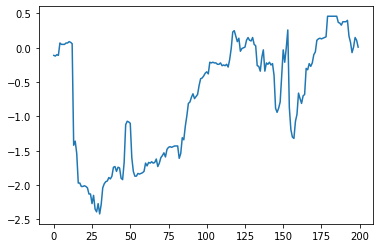

In [64]:
pretty_strat_df(ic)['running profit'].plot()

In [96]:
from strategies import LegMeta
from utils import pretty_strat_df

In [59]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= -10, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= -10, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 0, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 0, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 10, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 10, exp_offset= 1),
]  
strat = StrategyBase(legs, qbw=qbw)
performance = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once')
plots.plot_candles_and_profit(performance, lines=[f'{l.name}_strike' for l in strat.legs])
pretty_strat_df(performance)

,underlying open,underlying close,strategy open,strategy close,hourly profit,date,dte,new option,sell call -10 0 strike,sell call -10 0 exp,...,buy call -10 1 close,sell call 0 0 open,sell call 0 0 close,buy call 0 1 open,buy call 0 1 close,sell call 10 0 open,sell call 10 0 close,buy call 10 1 open,buy call 10 1 close,running profit
0,304.75,307.99,-8.42,-8.52,-0.11,2022-08-03 13:00:00,2.12,True,273.0,2022-08-05 00:00:00,...,-36.07,6.23,8.21,-11.36,-13.21,0.11,0.20,-2.14,-2.71,-0.11
1,307.94,307.45,-8.53,-8.51,-0.01,2022-08-03 14:00:00,2.08,False,273.0,2022-08-05 16:00:00,...,-35.55,8.13,7.81,-13.16,-12.87,0.19,0.17,-2.69,-2.59,-0.12
2,307.47,307.98,-8.52,-8.54,0.02,2022-08-03 15:00:00,2.04,False,273.0,2022-08-05 16:00:00,...,-36.04,7.78,8.11,-12.86,-13.16,0.17,0.18,-2.58,-2.68,-0.10
3,307.99,307.40,-8.54,-8.53,-0.01,2022-08-03 16:00:00,2.00,False,273.0,2022-08-05 16:00:00,...,-35.49,8.08,7.69,-13.14,-12.79,0.18,0.16,-2.66,-2.55,-0.11
4,311.24,311.54,-8.70,-8.70,0.17,2022-08-04 10:00:00,1.25,False,273.0,2022-08-05 16:00:00,...,-39.24,9.63,9.87,-14.74,-14.94,0.11,0.12,-3.02,-3.08,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,293.68,291.00,-7.77,-7.62,-0.15,2022-09-13 12:00:00,3.17,False,269.0,2022-09-16 16:00:00,...,-24.83,3.87,2.95,-8.28,-7.15,0.08,0.05,-1.40,-1.12,0.18
196,291.00,292.30,-7.62,-7.70,0.08,2022-09-13 13:00:00,3.12,False,269.0,2022-09-16 16:00:00,...,-25.89,2.92,3.34,-7.13,-7.66,0.05,0.06,-1.11,-1.24,0.26
197,292.27,294.83,-7.70,-7.84,0.14,2022-09-13 14:00:00,3.08,False,269.0,2022-09-16 16:00:00,...,-28.03,3.30,4.25,-7.63,-8.76,0.06,0.09,-1.23,-1.51,0.40
198,294.83,294.10,-7.84,-7.81,-0.04,2022-09-13 15:00:00,3.04,False,269.0,2022-09-16 16:00:00,...,-27.39,4.21,3.92,-8.73,-8.40,0.09,0.08,-1.50,-1.42,0.37


In [104]:
performance = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once',
    combine_legs=True)
plots.plot_candles_and_profit(performance, lines=[f'{l.name}_strike' for l in strat.legs])
pretty_strat_df(performance)

In [106]:
tsla = qbw.get_tsla(1000)
performance = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once',
    combine_legs=True)
plots.plot_candles_and_profit(performance, lines=[f'{l.name}_strike' for l in strat.legs])
pretty_strat_df(performance)

,underlying open,underlying close,strategy open,strategy close,hourly profit,date,dte,new option,sell call -10 0 strike,sell call -10 0 exp,...,buy call -10 1 exp,sell call 0 0 strike,sell call 0 0 exp,buy call 0 1 strike,buy call 0 1 exp,sell call 10 0 strike,sell call 10 0 exp,buy call 10 1 strike,buy call 10 1 exp,running profit
0,302.46,297.60,-8.48,-8.20,-0.28,2022-02-17 11:00:00,1.21,True,271.0,2022-02-18 00:00:00,...,2022-02-25 00:00:00,301.0,2022-02-18 00:00:00,301.0,2022-02-25 00:00:00,331.0,2022-02-18 00:00:00,331.0,2022-02-25 00:00:00,-0.28
1,297.64,296.38,-8.21,-8.11,-0.09,2022-02-17 12:00:00,1.17,False,271.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,331.0,2022-02-18 16:00:00,331.0,2022-02-25 16:00:00,-0.37
2,296.40,295.91,-8.12,-8.08,-0.03,2022-02-17 13:00:00,1.12,False,271.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,331.0,2022-02-18 16:00:00,331.0,2022-02-25 16:00:00,-0.41
3,295.96,293.74,-8.09,-7.87,-0.20,2022-02-17 14:00:00,1.08,False,271.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,331.0,2022-02-18 16:00:00,331.0,2022-02-25 16:00:00,-0.61
4,293.71,292.80,-7.87,-7.78,-0.09,2022-02-17 15:00:00,1.04,False,271.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,331.0,2022-02-18 16:00:00,331.0,2022-02-25 16:00:00,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,293.68,291.00,-7.77,-7.62,-0.15,2022-09-13 12:00:00,3.17,False,269.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,329.0,2022-09-16 16:00:00,329.0,2022-09-23 16:00:00,-13.38
996,291.00,292.30,-7.62,-7.70,0.08,2022-09-13 13:00:00,3.12,False,269.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,329.0,2022-09-16 16:00:00,329.0,2022-09-23 16:00:00,-13.30
997,292.27,294.83,-7.70,-7.84,0.14,2022-09-13 14:00:00,3.08,False,269.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,329.0,2022-09-16 16:00:00,329.0,2022-09-23 16:00:00,-13.16
998,294.83,294.10,-7.84,-7.81,-0.04,2022-09-13 15:00:00,3.04,False,269.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,329.0,2022-09-16 16:00:00,329.0,2022-09-23 16:00:00,-13.20


In [107]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= -15, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 0, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 0, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 15, exp_offset= 1),
]  
strat = StrategyBase(legs, qbw=qbw)
performance = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once',
    combine_legs=True)
plots.plot_candles_and_profit(performance, lines=[f'{l.name}_strike' for l in strat.legs])
pretty_strat_df(performance)

,underlying open,underlying close,strategy open,strategy close,hourly profit,date,dte,new option,sell call -15 0 strike,sell call -15 0 exp,...,buy call -15 1 exp,sell call 0 0 strike,sell call 0 0 exp,buy call 0 1 strike,buy call 0 1 exp,sell call 15 0 strike,sell call 15 0 exp,buy call 15 1 strike,buy call 15 1 exp,running profit
0,302.46,297.60,-6.48,-6.30,-0.17,2022-02-17 11:00:00,1.21,True,259.0,2022-02-18 00:00:00,...,2022-02-25 00:00:00,301.0,2022-02-18 00:00:00,301.0,2022-02-25 00:00:00,349.0,2022-02-18 00:00:00,349.0,2022-02-25 00:00:00,-0.17
1,297.64,296.38,-6.33,-6.22,-0.08,2022-02-17 12:00:00,1.17,False,259.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,349.0,2022-02-18 16:00:00,349.0,2022-02-25 16:00:00,-0.26
2,296.40,295.91,-6.24,-6.19,-0.03,2022-02-17 13:00:00,1.12,False,259.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,349.0,2022-02-18 16:00:00,349.0,2022-02-25 16:00:00,-0.28
3,295.96,293.74,-6.22,-5.96,-0.24,2022-02-17 14:00:00,1.08,False,259.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,349.0,2022-02-18 16:00:00,349.0,2022-02-25 16:00:00,-0.52
4,293.71,292.80,-5.97,-5.84,-0.11,2022-02-17 15:00:00,1.04,False,259.0,2022-02-18 16:00:00,...,2022-02-25 16:00:00,301.0,2022-02-18 16:00:00,301.0,2022-02-25 16:00:00,349.0,2022-02-18 16:00:00,349.0,2022-02-25 16:00:00,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,293.68,291.00,-5.63,-5.50,-0.12,2022-09-13 12:00:00,3.17,False,257.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,347.0,2022-09-16 16:00:00,347.0,2022-09-23 16:00:00,-5.62
996,291.00,292.30,-5.51,-5.57,0.07,2022-09-13 13:00:00,3.12,False,257.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,347.0,2022-09-16 16:00:00,347.0,2022-09-23 16:00:00,-5.55
997,292.27,294.83,-5.57,-5.69,0.12,2022-09-13 14:00:00,3.08,False,257.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,347.0,2022-09-16 16:00:00,347.0,2022-09-23 16:00:00,-5.43
998,294.83,294.10,-5.69,-5.66,-0.03,2022-09-13 15:00:00,3.04,False,257.0,2022-09-16 16:00:00,...,2022-09-23 16:00:00,299.0,2022-09-16 16:00:00,299.0,2022-09-23 16:00:00,347.0,2022-09-16 16:00:00,347.0,2022-09-23 16:00:00,-5.46


In [109]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset=-15, exp_offset= 7),
    LegMeta(trans='buy',  contract='call', strike_offset=-15, exp_offset= 14),
    LegMeta(trans='sell', contract='call', strike_offset=0, exp_offset= 7),
    LegMeta(trans='buy',  contract='call', strike_offset=0, exp_offset= 14),
    LegMeta(trans='sell', contract='call', strike_offset=15, exp_offset= 7),
    LegMeta(trans='buy',  contract='call', strike_offset=15, exp_offset= 14),
]  
strat = StrategyBase(legs, qbw=qbw)
performance = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='once',
    combine_legs=True)
plots.plot_candles_and_profit(performance, lines=[f'{l.name}_strike' for l in strat.legs])
pretty_strat_df(performance)

,underlying open,underlying close,strategy open,strategy close,hourly profit,date,dte,new option,sell call -15 7 strike,sell call -15 7 exp,...,buy call -15 14 exp,sell call 0 7 strike,sell call 0 7 exp,buy call 0 14 strike,buy call 0 14 exp,sell call 15 7 strike,sell call 15 7 exp,buy call 15 14 strike,buy call 15 14 exp,running profit
0,302.46,297.60,0,0,0.0,2022-02-17 11:00:00,1.21,True,259.0,2022-03-11 00:00:00,...,2022-03-11 00:00:00,301.0,2022-03-11 00:00:00,301.0,2022-03-11 00:00:00,349.0,2022-03-11 00:00:00,349.0,2022-03-11 00:00:00,0.0
1,297.64,296.38,0,0,-0.0,2022-02-17 12:00:00,1.17,False,259.0,2022-04-08 16:00:00,...,2022-05-27 16:00:00,301.0,2022-04-08 16:00:00,301.0,2022-05-27 16:00:00,349.0,2022-04-08 16:00:00,349.0,2022-05-27 16:00:00,0.0
2,296.40,295.91,0,0,-0.0,2022-02-17 13:00:00,1.12,False,259.0,2022-04-08 16:00:00,...,2022-05-27 16:00:00,301.0,2022-04-08 16:00:00,301.0,2022-05-27 16:00:00,349.0,2022-04-08 16:00:00,349.0,2022-05-27 16:00:00,0.0
3,295.96,293.74,0,0,-0.0,2022-02-17 14:00:00,1.08,False,259.0,2022-04-08 16:00:00,...,2022-05-27 16:00:00,301.0,2022-04-08 16:00:00,301.0,2022-05-27 16:00:00,349.0,2022-04-08 16:00:00,349.0,2022-05-27 16:00:00,0.0
4,293.71,292.80,0,0,-0.0,2022-02-17 15:00:00,1.04,False,259.0,2022-04-08 16:00:00,...,2022-05-27 16:00:00,301.0,2022-04-08 16:00:00,301.0,2022-05-27 16:00:00,349.0,2022-04-08 16:00:00,349.0,2022-05-27 16:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,293.68,291.00,0,0,-0.0,2022-09-13 12:00:00,3.17,False,257.0,2022-11-04 16:00:00,...,2022-12-23 16:00:00,299.0,2022-11-04 16:00:00,299.0,2022-12-23 16:00:00,347.0,2022-11-04 16:00:00,347.0,2022-12-23 16:00:00,0.0
996,291.00,292.30,0,0,-0.0,2022-09-13 13:00:00,3.12,False,257.0,2022-11-04 16:00:00,...,2022-12-23 16:00:00,299.0,2022-11-04 16:00:00,299.0,2022-12-23 16:00:00,347.0,2022-11-04 16:00:00,347.0,2022-12-23 16:00:00,0.0
997,292.27,294.83,0,0,-0.0,2022-09-13 14:00:00,3.08,False,257.0,2022-11-04 16:00:00,...,2022-12-23 16:00:00,299.0,2022-11-04 16:00:00,299.0,2022-12-23 16:00:00,347.0,2022-11-04 16:00:00,347.0,2022-12-23 16:00:00,0.0
998,294.83,294.10,0,0,-0.0,2022-09-13 15:00:00,3.04,False,257.0,2022-11-04 16:00:00,...,2022-12-23 16:00:00,299.0,2022-11-04 16:00:00,299.0,2022-12-23 16:00:00,347.0,2022-11-04 16:00:00,347.0,2022-12-23 16:00:00,0.0


In [110]:
tsla

,open,high,low,close,volume
time,,,,,
2022-02-17 11:00:00,302.459970,303.499970,295.999970,297.603304,10738849.0
2022-02-17 12:00:00,297.643304,299.736637,295.606637,296.379970,7208845.0
2022-02-17 13:00:00,296.396637,298.109970,295.499970,295.913304,5848780.0
2022-02-17 14:00:00,295.956637,296.033304,293.366637,293.736637,6047713.0
2022-02-17 15:00:00,293.709971,293.946637,291.999971,292.799971,5935990.0
...,...,...,...,...,...
2022-09-13 12:00:00,293.680000,293.990000,290.400000,291.000000,7883773.0
2022-09-13 13:00:00,291.000000,293.280000,290.670000,292.300000,5298142.0
2022-09-13 14:00:00,292.270000,295.500000,291.780000,294.830000,9703434.0


In [114]:
start = datetime(2022,2,17)
end = datetime(2022,9,13)

In [115]:
tsla = qbw.get_tsla(start=start, end=end)


In [116]:
tsla

,open,high,low,close,volume
time,,,,,
2022-02-17 10:00:00,304.419970,306.159969,301.756636,302.539970,6628231.0
2022-02-17 11:00:00,302.459970,303.499970,295.999970,297.603304,10738849.0
2022-02-17 12:00:00,297.643304,299.736637,295.606637,296.379970,7208845.0
2022-02-17 13:00:00,296.396637,298.109970,295.499970,295.913304,5848780.0
2022-02-17 14:00:00,295.956637,296.033304,293.366637,293.736637,6047713.0
...,...,...,...,...,...
2022-09-12 12:00:00,303.500000,303.900000,301.630000,302.120000,5867055.0
2022-09-12 13:00:00,302.130000,304.070000,301.120000,303.990000,5081936.0
2022-09-12 14:00:00,304.010000,304.620000,303.400000,303.850000,3963340.0


In [117]:
from quantconnect import load_tsla_hourly
tsla = load_tsla_hourly()

In [118]:
tsla

,open,high,low,close,volume
datetime,,,,,
2010-06-29 10:00:00,1.266667,1.266667,1.266667,1.266667,30418608.0
2010-06-29 11:00:00,1.266667,1.266667,1.266667,1.266667,0.0
2010-06-29 12:00:00,1.266667,1.266667,1.169333,1.205333,94438839.0
2010-06-29 13:00:00,1.205333,1.233333,1.203333,1.224667,30010053.0
2010-06-29 14:00:00,1.225333,1.278000,1.221333,1.274667,25695108.0
...,...,...,...,...,...
2022-09-13 12:00:00,293.680000,293.990000,290.400000,291.000000,7883773.0
2022-09-13 13:00:00,291.000000,293.280000,290.670000,292.300000,5298142.0
2022-09-13 14:00:00,292.270000,295.500000,291.780000,294.830000,9703434.0


In [133]:
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= -15, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 0, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 0, exp_offset= 1),
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 15, exp_offset= 1),
]  
strat = StrategyBase(legs, qbw=qbw)

In [135]:
from aggregate import monte_carlo

In [143]:
profits = monte_carlo(strat, qbw, duration_weeks=10, num_tests=3, database='offline')

2021-04-26 10:00:00 2021-07-05 10:00:00


2021-02-26 10:00:00 2021-05-07 10:00:00
empty options strike: 591.0, expiry: 2021-02-26 00:00:00, start: 2021-02-26 00:00:00, right_abrev: c, res_abrev: h
all options at that expiry
        expiry  strike days_since_start
0  2021-02-26   480.0           0 days
1  2021-02-26   494.0           0 days
2  2021-02-26   508.0           0 days
3  2021-02-26   522.0           0 days
4  2021-02-26   536.0           0 days
5  2021-02-26   550.0           0 days
6  2021-02-26   564.0           0 days
7  2021-02-26   578.0           0 days
8  2021-02-26   592.0           0 days
9  2021-02-26   606.0           0 days
10 2021-02-26   620.0           0 days
11 2021-02-26   634.0           0 days
12 2021-02-26   648.0           0 days
13 2021-02-26   662.0           0 days
14 2021-02-26   676.0           0 days
15 2021-02-26   690.0           0 days
16 2021-02-26   704.0           0 days
17 2021-02-26   718.0           0 days
18 2021-02-26   732.0           0 days
19 2021-02-26   746.0           0 day

AssertionError: 

In [148]:
qbw.option_history(strike=591.0/3, expiry=datetime(2021,2,26,0), start=datetime(2021,2,26,0), right_abrev='c', res_abrev='h')

empty options strike: 591.0, expiry: 2021-02-26 00:00:00, start: 2021-02-26 00:00:00, right_abrev: c, res_abrev: h
all options at that expiry
        expiry  strike days_since_start
0  2021-02-26   480.0           0 days
1  2021-02-26   494.0           0 days
2  2021-02-26   508.0           0 days
3  2021-02-26   522.0           0 days
4  2021-02-26   536.0           0 days
5  2021-02-26   550.0           0 days
6  2021-02-26   564.0           0 days
7  2021-02-26   578.0           0 days
8  2021-02-26   592.0           0 days
9  2021-02-26   606.0           0 days
10 2021-02-26   620.0           0 days
11 2021-02-26   634.0           0 days
12 2021-02-26   648.0           0 days
13 2021-02-26   662.0           0 days
14 2021-02-26   676.0           0 days
15 2021-02-26   690.0           0 days
16 2021-02-26   704.0           0 days
17 2021-02-26   718.0           0 days
18 2021-02-26   732.0           0 days
19 2021-02-26   746.0           0 days
20 2021-02-26   760.0           0 days

AssertionError: 

In [ ]:
# look into starts and see if they're always landing on expiration dates

In [168]:
profits = monte_carlo(strat, qbw, duration_weeks=10, num_tests=15, database='offline')

2022-06-21 10:00:00 2022-08-30 10:00:00
2020-12-28 10:00:00 2021-03-08 10:00:00
2020-09-30 10:00:00 2020-12-09 10:00:00
2021-06-13 10:00:00 2021-08-22 10:00:00
2021-05-13 10:00:00 2021-07-22 10:00:00
2021-04-21 10:00:00 2021-06-30 10:00:00
2021-01-25 10:00:00 2021-04-05 10:00:00
2020-12-18 10:00:00 2021-02-26 10:00:00
empty options strike: 564.0, expiry: 2020-12-18 00:00:00, start: 2020-12-18 00:00:00, right_abrev: c, res_abrev: h
all options at that expiry
        expiry  strike days_since_start
0  2020-12-18   453.0           0 days
1  2020-12-18   466.0           0 days
2  2020-12-18   479.0           0 days
3  2020-12-18   492.0           0 days
4  2020-12-18   505.0           0 days
5  2020-12-18   518.0           0 days
6  2020-12-18   531.0           0 days
7  2020-12-18   544.0           0 days
8  2020-12-18   557.0           0 days
9  2020-12-18   570.0           0 days
10 2020-12-18   583.0           0 days
11 2020-12-18   596.0           0 days
12 2020-12-18   609.0         

AssertionError: 

In [166]:
plots.overlap_plots(profits, offsets=[654, 114, 25])